# Travel Insurance Claim Prediction

## Problem Definition

#### Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyze the data.

#### As a Data scientist in an insurance company, the hackathon challenge is to analyze the available data and predict whether to sanction the insurance or not.

### Data Description

##### The training dataset consists of data corresponding to 50553 customers and the test dataset consists of 12661 customers. Following are the features of the dataset

Target: Claim Status (Claim)

Name of agency (Agency)

Type of travel insurance agencies (Agency.Type)

Distribution channel of travel insurance agencies (Distribution.Channel)

Name of the travel insurance products (Product.Name)

Duration of travel (Duration)

Destination of travel (Destination)

Amount of sales of travel insurance policies (Net.Sales)

The commission received for travel insurance agency (Commission)

Gender of insured (Gender)

Age of insured (Age)

The travel agency business model works by the travel agent obtaining discounts from the airlines - because they buy so many flights. The travel agent then sells the flights to consumers with an added fee to cover its own costs.

In [56]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

from sklearn.utils import resample,shuffle
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 400)

In [2]:
df = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

In [3]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  object 
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  object 
 5   Duration              52310 non-null  int64  
 6   Destination           52310 non-null  object 
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


In [5]:
df.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,6005.745804,58.256108,48.554673,12.219963,39.555725,0.166699
std,2306.450475,109.138708,60.198589,22.847645,13.762473,0.372710
min,2000.000000,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,10.000000,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,24.000000,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,57.000000,55.000000,13.380000,43.000000,0.000000
max,10000.000000,4881.000000,682.000000,262.760000,118.000000,1.000000


In [6]:
df.groupby('Agency Type')['Claim']

In [7]:
df[df['Agency Type']=='Airlines']['Claim'].value_counts()

0    11792
1     5522
Name: Claim, dtype: int64

In [8]:
df[df['Agency Type']=='Travel Agency']['Claim'].value_counts()

0    31798
1     3198
Name: Claim, dtype: int64

In [9]:
# percentage of customers for whom insurance were claimed
df[df['Agency Type']=='Airlines']['Claim'].value_counts()[1]/((df[df['Agency Type']=='Airlines']['Claim'].value_counts()[0])+df[df['Agency Type']=='Airlines']['Claim'].value_counts()[1])

0.3189326556543837

In [10]:
# percentage of customers for whom insurance were claimed
df[df['Agency Type']=='Travel Agency']['Claim'].value_counts()[1]/((df[df['Agency Type']=='Airlines']['Claim'].value_counts()[0])+df[df['Agency Type']=='Travel Agency']['Claim'].value_counts()[1])

0.2133422281521014

In [11]:
df[df['Claim']==1]

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
8,3017,EPX,Travel Agency,Online,2 way Comprehensive Plan,13,CHINA,48.662699,0.000000,36,1
9,8054,C2B,Airlines,Online,Bronze Plan,10,SINGAPORE,23.258824,5.817294,28,1
10,3595,EPX,Travel Agency,Online,2 way Comprehensive Plan,83,CHINA,66.823793,0.000000,36,1
11,8195,C2B,Airlines,Online,Silver Plan,22,SINGAPORE,82.550000,20.640000,31,1
14,2165,C2B,Airlines,Online,Bronze Plan,17,SINGAPORE,58.211644,14.552911,66,1
...,...,...,...,...,...,...,...,...,...,...,...
52272,4619,C2B,Airlines,Online,Silver Plan,11,SINGAPORE,29.827737,7.461934,54,1
52277,4521,EPX,Travel Agency,Online,2 way Comprehensive Plan,220,NEPAL,43.014746,0.000000,36,1
52286,4595,C2B,Airlines,Online,Bronze Plan,20,SINGAPORE,20.621051,5.159051,28,1
52288,8192,C2B,Airlines,Online,Silver Plan,13,SINGAPORE,53.484565,13.376141,25,1


In [12]:
df.groupby('Claim')['Net Sales'].sum()

Claim
0    1.732955e+06
1    8.069398e+05
Name: Net Sales, dtype: float64

In [13]:
df[df['Claim']==0]['Net Sales'].sum()

1732955.15

In [14]:
df[df['Claim']==1]['Net Sales'].sum()

806939.7984938747

In [15]:
1732955.15 - 806939.7984938747

926015.3515061252

In [16]:
df[(df['Claim']==0) & (df['Net Sales']<0)].shape

(487, 11)

In [17]:
df[(df['Claim']==1) & (df['Net Sales']<0)].shape

(16, 11)

In [18]:
df[(df['Claim']==0) & (df['Net Sales']>0)].shape

(41766, 11)

In [19]:
df[(df['Claim']==1) & (df['Net Sales']>0)].shape

(8704, 11)

In [20]:
df[(df['Claim']==0)]['Commision (in value)'].sum()

417438.19

In [21]:
df[(df['Claim']==1)]['Commision (in value)'].sum()

221788.08897815706

In [22]:
417438.19 - 221788.08897815706 

195650.10102184294

### Data Analysis


#### Univariate Analysis
##### Claim count

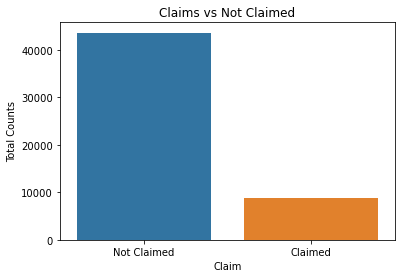

In [23]:
sns.countplot(df['Claim'])
plt.xticks([0,1],["Not Claimed","Claimed"])
plt.ylabel('Total Counts')
plt.title("Claims vs Not Claimed")
plt.show()

Text(0.5, 1.0, 'Top 10 Destination')

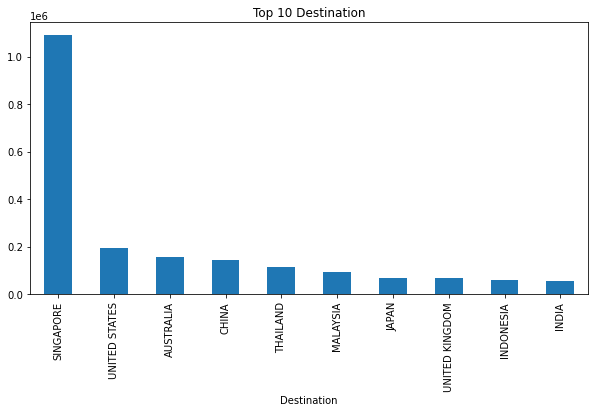

In [47]:
df.groupby('Destination')['Net Sales'].sum().nlargest(10).plot(kind='bar',figsize=(10,5))
plt.title("Top 10 Destination")

<AxesSubplot:>

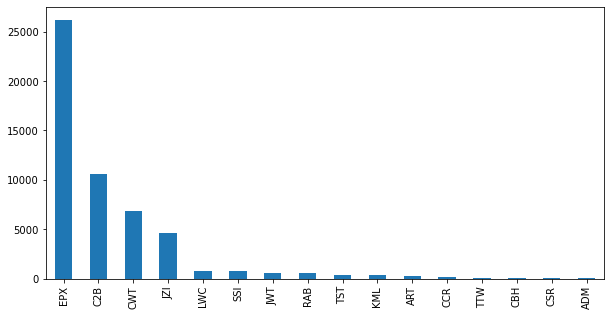

In [25]:
df['Agency'].value_counts().plot(kind='bar',figsize=(10,5))

<AxesSubplot:>

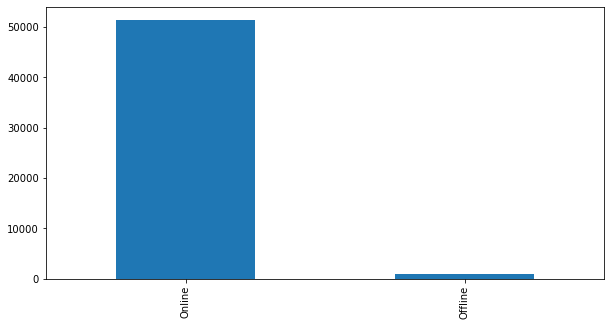

In [27]:
df['Distribution Channel'].value_counts().plot(kind='bar',figsize=(10,5))

<AxesSubplot:>

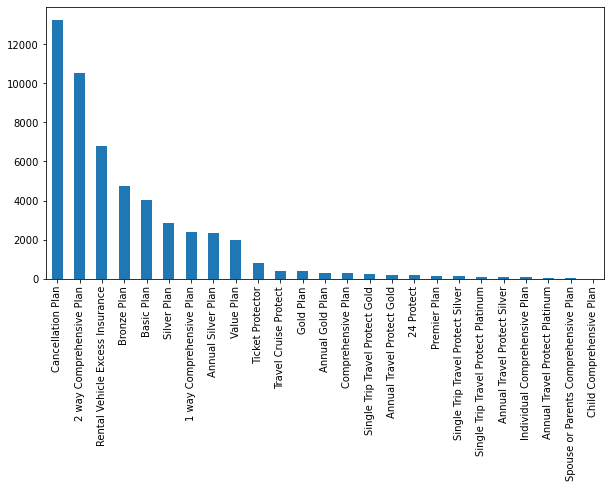

In [29]:
df['Product Name'].value_counts().plot(kind='bar',figsize=(10,5))

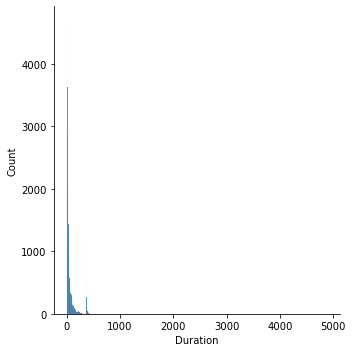

In [31]:
sns.displot(df, x="Duration")

## Categorical and Numerical Features

In [36]:
# IDENTIFYING NUMERICAL FEATURES
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical Features:")
print(numerical_col)
print("===="*25)

# IDENTIFYING CATEGORICAL FEATURES
categorical_col = df.select_dtypes(exclude=np.number).columns.tolist() # excludes data with numeric features
                                                                
print("Categorical Features:")
print(categorical_col)
print("===="*25)



Numerical Features:
['ID', 'Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Claim']
Categorical Features:
['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination']


In [38]:
categorical_col = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name']

## Univariate analysis of Categorical data

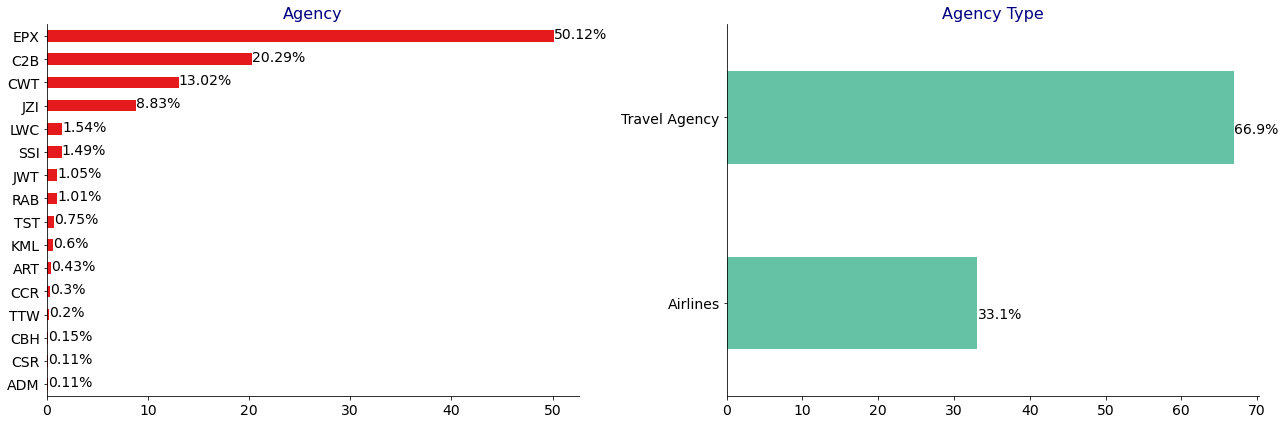

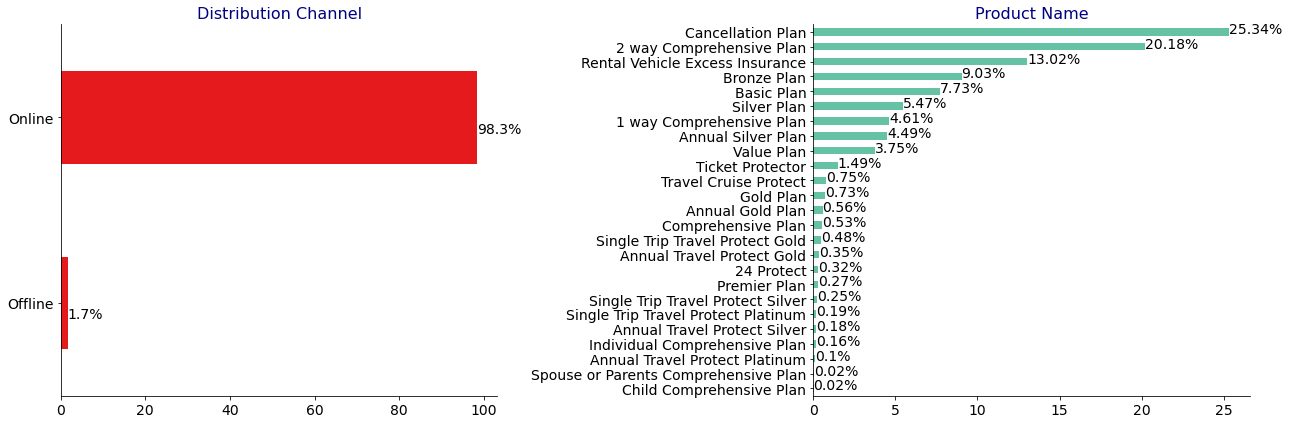

In [43]:
# creating bar plots for analysis categorical data

for i in range(0,len(categorical_col),2):  # taking steps of 2 to get adjacent plots
        if len(categorical_col) > i+1:   
                
                plt.figure(figsize=(18,6))  # initializing the figure
                
                plt.subplot(121)    # creating the first subplot
#                 sns.despine()       # removing the right and top boundary lines (spines) of figures
                
                s = ((df[categorical_col[i]]            # choosing the ith categorical variable
                      .value_counts(normalize=True)*100)  # relative frequencies of each category in %
                      .sort_values()                      # sorting values in descending order
                      .plot(kind='barh', cmap='Set1')     # creating a horizontal bar plot on the sorted data
                    )
                
                for rect in s.patches:    # this for loop creates annotations of the value for each bar in the plot
                    
                    plt.text(rect.get_width(), # x co-ordinate to place the text
                             rect.get_y() + rect.get_height()/3., # y co-ordinate to place the text
                             str(round(rect.get_width(),2))+'%', # the text to be displayed
                             fontsize=14 )
                    
                plt.xticks(size=14)
                plt.yticks(size=14)     
                plt.title(categorical_col[i],color='navy', fontsize=16)  # setting the title for the plot
                
                
                # the code below functions in the same way as above and creates adjacent plots
                plt.subplot(122)     
                sns.despine()
                
                t = ((df[categorical_col[i+1]]
                      .value_counts(normalize=True)*100)
                      .sort_values()
                      .plot(kind='barh', cmap='Set2')
                    )
#                 print(t)
                
                for rect in t.patches:
                    plt.text(rect.get_width(), 
                             rect.get_y() + rect.get_height()/3., 
                             str(round(rect.get_width(),2))+'%', 
                              fontsize=14 )
                    
                plt.xticks(size=14)
                plt.yticks(size=14)     
                plt.title(categorical_col[i+1], color='navy', fontsize=16)
                
                plt.tight_layout()
                plt.show()   # displays the figure and clears the residue text

                
        # creating a similar plot for the last categorical variable (the target variable)
        else:
                t = ((df[categorical_col[i]]
                      .value_counts(normalize=True)*100)
                      .sort_values()
                      .plot(kind='barh')
                    )
                sns.despine()
                
                for rect in t.patches:
                    print(rect)
                    plt.text(rect.get_width(), rect.get_y() + rect.get_height()/3., str(round(rect.get_width(),2))+'%', 
                              fontsize=14)
                plt.xticks(size=14)
                plt.yticks(size=14)     
                plt.title(categorical_col[i], color='navy', fontsize=16)
        

## Bivariate Analysis of Categorical features

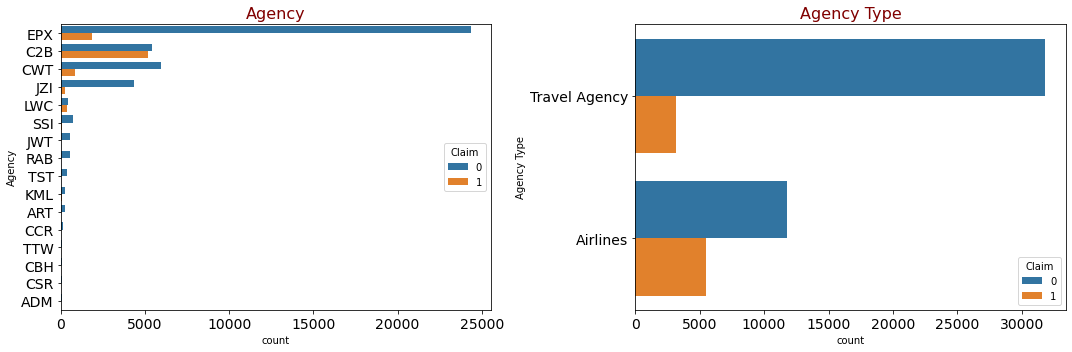

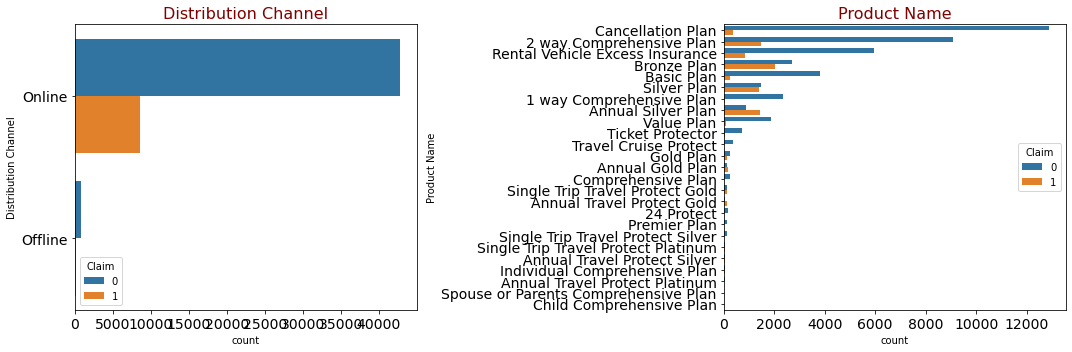

In [44]:
# the code below creates bar plots for the categorical features with respect to the target variable

for i in range(0,len(categorical_col),2):  # looping through steps of 2 to create adjacent plots
    
    if len(categorical_col) > i+1:
        
        plt.figure(figsize=(15,5))
        
        plt.subplot(121)   # first subplot
        sns.countplot(y=df[categorical_col[i]],  # selecting the variable to create the plot
                      hue=df['Claim'],  # splitting up the data based upon the target variable
                      order = df[categorical_col[i]].value_counts().index,  # displaying the data in descending order
                      data=df)
        
        plt.xticks(size=14)
        plt.yticks(size=14)
        plt.title(categorical_col[i], color='maroon', fontsize=16)  # setting the title
        
        
        plt.subplot(122)  # second subplot          
        sns.countplot(y=df[categorical_col[i+1]],
                      hue=df['Claim'], 
                      order=df[categorical_col[i+1]].value_counts().index, 
                      data=df)
        
        plt.xticks(size=14)
        plt.yticks(size=14)
        plt.title(categorical_col[i+1], color='maroon', fontsize=16)
        
        plt.tight_layout()
        plt.show()

## Observations:

### The common traits seen for customers who have claimed for the Insurance are :
- The customers who has hired Agent, has comparatively claimed less for Insurance. So these are low risk customers
- The online Distribution channel has customers with low risk customers as compared to offline Distibution channel.



## Analysis of Numerical data

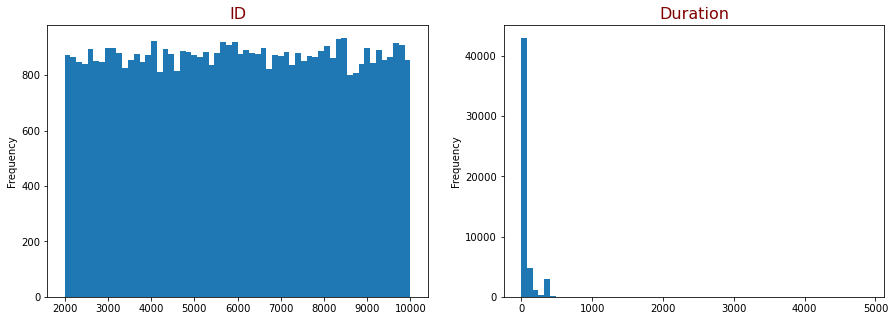

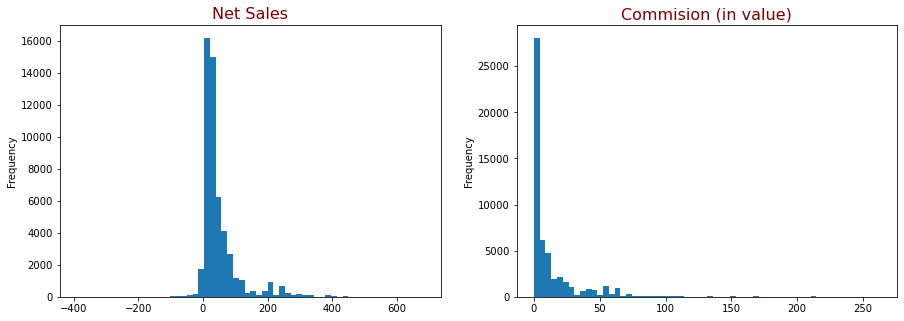

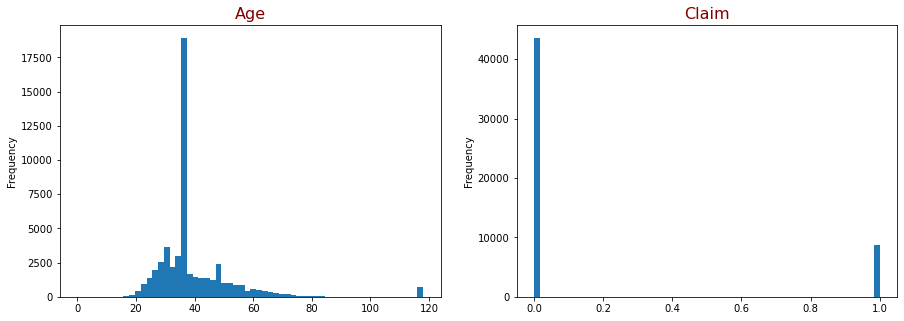

Statistical description of the numerical features:


,ID,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,6005.745804,58.256108,48.554673,12.219963,39.555725,0.166699
std,2306.450475,109.138708,60.198589,22.847645,13.762473,0.372710
min,2000.000000,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,10.000000,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,24.000000,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,57.000000,55.000000,13.380000,43.000000,0.000000
max,10000.000000,4881.000000,682.000000,262.760000,118.000000,1.000000


In [47]:
# creating histograms for numerical features

for i in range(0,len(numerical_col),2):
    
    plt.figure(figsize=(15,5))
    
    plt.subplot(121)
    df[numerical_col[i]].plot.hist(bins=60)
    plt.title(numerical_col[i], color='maroon', fontsize=16)
    
    plt.subplot(122)
    df[numerical_col[i+1]].plot.hist(bins=60)
    plt.title(numerical_col[i+1], color='maroon', fontsize=16)
    
    plt.show()
    
    
print("Statistical description of the numerical features:")
df.describe()

## Observations
- As we can see from the histogram, the features age, Commission(in values) are heavily skewed and this is due to the presence of outliers as seen from the huge difference in the 75th percentile and maximum values of these features in the statistical description. We will deal with these outliers in the further steps.

## Treating outliers in the continuous columns

In [48]:
# the following function will detect the number of outliers in each column of the data set

def detect_outliers(dataframe):
    """This function will detect the outliers present in each column of the dataframe and will return a new dataframe with column name and corresponding number of outliers based on the InterQuartile Range.
    
    Parameters:
    ----------------------
    dataframe : pandas DataFrame object
    
    Returns:
    ----------------------
    dataframe with feature names from original dataframe and number of outliers in each feature
    """
    
    cols = list(dataframe) # A List of all features

    outliers = pd.DataFrame(columns=['Feature','Number of Outliers']) # Creating a new dataframe to display number of outliers

    for column in cols: # Iterating thorough each feature
        if column in dataframe.select_dtypes(include=np.number).columns: # checking if the feature contains numeric data and only using continuous (numeric) columns

                # first quartile (Q1) 
            q1 = dataframe[column].quantile(0.25) 

                # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)

                # Inter-Quartile Range (IQR)
            iqr = q3 - q1

                # defining range for detecting outliers
            lower_fence = q1 - (1.5*iqr)
            upper_fence = q3 + (1.5*iqr)

               # the below code detects which data points lie outside of 1.5 times of the calculated InterQuartile range 
               # and counts them and adds the number to the outlier dataframe along with the corresponding feature name
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < lower_fence) | 
                                                                                            (dataframe[column] > upper_fence)].shape[0]},ignore_index=True)
    return outliers
detect_outliers(df)

,Feature,Number of Outliers
0,ID,0
1,Duration,5484
2,Net Sales,5335
3,Commision (in value),6394
4,Age,3675
5,Claim,8720


In [50]:
# the following code treats outliers 
from scipy.stats.mstats import winsorize
df1 = df.drop(['Claim'],1)

for col in df1.columns.to_list():
    if col in df1.select_dtypes(include=np.number).columns:
        df1[col] = winsorize(df1[col], limits=[0.05, 0.1],inclusive=(True, True))
detect_outliers(df1)

,Feature,Number of Outliers
0,ID,0
1,Duration,5484
2,Net Sales,0
3,Commision (in value),6394
4,Age,0


## Label encoding

In [52]:
#performing label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in categorical_col:
    try:
        df1[feature] = le.fit_transform(df1[feature])
    except:
        print('Error encoding '+feature)

In [53]:
df1.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,2402,7,1,1,10,61,PHILIPPINES,12.0,0.00,41
1,4245,7,1,1,10,4,MALAYSIA,17.0,0.00,35
2,9210,6,1,1,16,26,THAILAND,19.8,11.88,47
3,4754,7,1,1,1,15,HONG KONG,27.0,0.00,48
4,8840,7,1,1,1,15,MALAYSIA,37.0,0.00,36


In [54]:
df1.drop(["Destination"],1,inplace=True)

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  int32  
 2   Agency Type           52310 non-null  int32  
 3   Distribution Channel  52310 non-null  int32  
 4   Product Name          52310 non-null  int32  
 5   Duration              52310 non-null  int64  
 6   Net Sales             52310 non-null  float64
 7   Commision (in value)  52310 non-null  float64
 8   Age                   52310 non-null  int64  
dtypes: float64(2), int32(4), int64(3)
memory usage: 2.8 MB


## Fit vanilla classification models

LOGISTIC REGRESSION

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     10882
           1       0.60      0.21      0.31      2196

    accuracy                           0.84     13078
   macro avg       0.73      0.59      0.61     13078
weighted avg       0.82      0.84      0.81     13078

ROC_AUC_SCORE for Logistic Regression is 0.5913569775994114


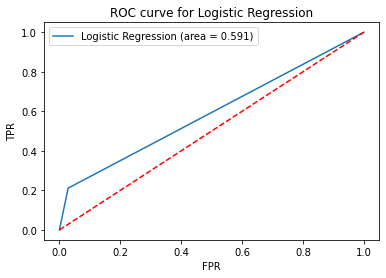

DECISION TREE

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10882
           1       0.67      0.67      0.67      2196

    accuracy                           0.89     13078
   macro avg       0.80      0.80      0.80     13078
weighted avg       0.89      0.89      0.89     13078

ROC_AUC_SCORE for Decision Tree is 0.8007086032012892


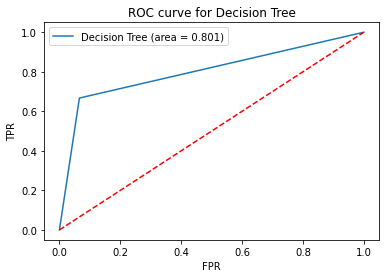

RANDOM FOREST

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     10882
           1       0.77      0.61      0.68      2196

    accuracy                           0.90     13078
   macro avg       0.85      0.79      0.81     13078
weighted avg       0.90      0.90      0.90     13078

ROC_AUC_SCORE for Random Forest is 0.7889521272909692


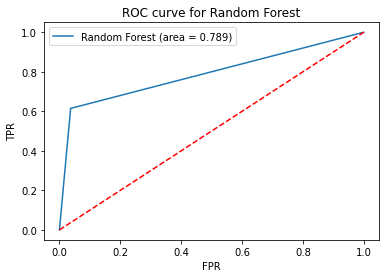

XGBOOST

[21:37:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10882
           1       0.79      0.69      0.74      2196

    accuracy                           0.92     13078
   macro avg       0.87      0.83      0.84     13078
weighted avg       0.91      0.92      0.91     13078

ROC_AUC_SCORE for XGBoost is 0.8257475287979114


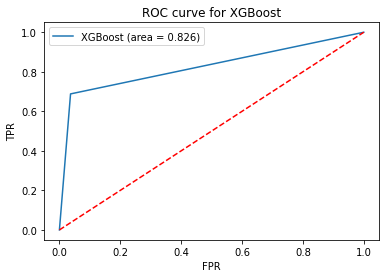

GRADIENT BOOSTING

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     10882
           1       0.65      0.41      0.51      2196

    accuracy                           0.86     13078
   macro avg       0.77      0.68      0.71     13078
weighted avg       0.85      0.86      0.85     13078

ROC_AUC_SCORE for Gradient Boosting is 0.6849124437708835


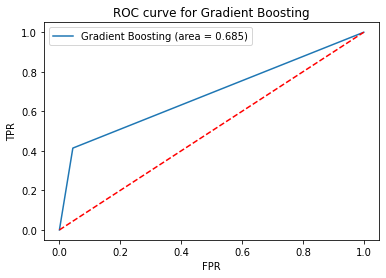

In [57]:
# Predictors
# X = cleaned_data.drop('y', axis=1)
X = df1

# Target
y = df['Claim']


X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Choosing the models
models = {'Logistic Regression':LogisticRegression,'Decision Tree':DecisionTreeClassifier,
          'Random Forest': RandomForestClassifier,'XGBoost':XGBClassifier,'Gradient Boosting':GradientBoostingClassifier}

for i in models.items():
    print(i[0].upper())
    print()
    
    model = i[1]()

    model.fit(X_train, y_train)
    
    y_predicted = model.predict(X_test)
    
    auc = roc_auc_score(y_test, y_predicted)
    
    print('Classification Report:')
    print(classification_report(y_test,y_predicted))
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predicted)
    print('ROC_AUC_SCORE for '+i[0]+' is',roc_auc_score(y_test, y_predicted))
    
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
    plt.plot(false_positive_rate, true_positive_rate, label= i[0]+' (area = %0.03f)' % auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc="upper left")
    plt.title('ROC curve for '+i[0])
    plt.show()
    print("="*60)